## Matthew Afsahi IAF 604

###### NOTE THAT I DID NOT USE A RANDOM SEED, SO YOUR RESULT MAY DIFFERED 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf

In [2]:
train = pd.read_csv('pisa2009train.csv')

In [3]:
train.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
grade,3663.0,10.089817,0.554375,8.00,10.000,10.00,10.00,12.0
male,3663.0,0.511057,0.499946,0.00,0.000,1.00,1.00,1.0
preschool,3607.0,0.722761,0.447697,0.00,0.000,1.00,1.00,1.0
expectBachelors,3601.0,0.785893,0.410259,0.00,1.000,1.00,1.00,1.0
motherHS,3566.0,0.879978,0.325033,0.00,1.000,1.00,1.00,1.0
motherBachelors,3266.0,0.348132,0.476451,0.00,0.000,0.00,1.00,1.0
motherWork,3570.0,0.734454,0.441685,0.00,0.000,1.00,1.00,1.0
fatherHS,3418.0,0.859274,0.347789,0.00,1.000,1.00,1.00,1.0
fatherBachelors,3094.0,0.331933,0.470983,0.00,0.000,0.00,1.00,1.0
fatherWork,3430.0,0.853061,0.354096,0.00,1.000,1.00,1.00,1.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

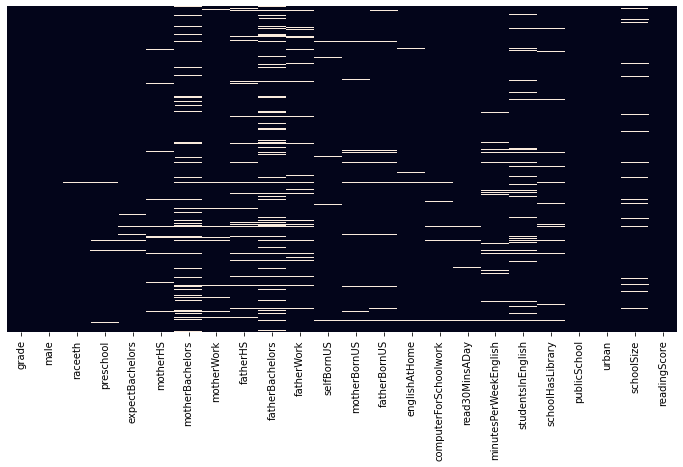

In [6]:
# Null Values

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

In [7]:
""" Percentage of the Null Values"""

np.round(100 *((train.isnull().sum())/len(train)),0)
    


grade                     0.0
male                      0.0
raceeth                   1.0
preschool                 2.0
expectBachelors           2.0
motherHS                  3.0
motherBachelors          11.0
motherWork                3.0
fatherHS                  7.0
fatherBachelors          16.0
fatherWork                6.0
selfBornUS                2.0
motherBornUS              2.0
fatherBornUS              3.0
englishAtHome             2.0
computerForSchoolwork     2.0
read30MinsADay            1.0
minutesPerWeekEnglish     5.0
studentsInEnglish         7.0
schoolHasLibrary          4.0
publicSchool              0.0
urban                     0.0
schoolSize                4.0
readingScore              0.0
dtype: float64

In [8]:
train['raceeth'].value_counts()

White                                     2015
Hispanic                                   834
Black                                      444
Asian                                      143
More than one race                         124
American Indian/Alaska Native               37
Native Hawaiian/Other Pacific Islander      31
Name: raceeth, dtype: int64

In [9]:
train['raceeth'].isnull().sum()

35

In [10]:
train['raceeth'].describe()

count      3628
unique        7
top       White
freq       2015
Name: raceeth, dtype: object

In [11]:
#Imputting the raceeth with the most frequent variable which is a categorical object
imp_obj=SimpleImputer(strategy="most_frequent")

In [12]:
train['raceeth']=imp_obj.fit_transform(train['raceeth'].values.reshape(-1,1))

In [13]:
len(train.columns)

24

In [14]:
len(pd.get_dummies(train,drop_first=True).columns)

29

In [15]:
train= pd.get_dummies(train
                      ,drop_first=True)

In [16]:
train.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,11,1,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,...,1,1,673.0,476.00,0,0,0,0,0,1
1,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,1173.0,575.01,0,0,0,0,0,1
2,9,1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,1,0,1233.0,554.81,0,0,0,0,0,1
3,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1,2640.0,458.11,0,1,0,0,0,0
4,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1095.0,613.89,0,0,1,0,0,0


In [17]:
# Imputting the null values with the BayesianRidge method to fill all the null values
imp_all_null=IterativeImputer()

In [18]:
train = pd.DataFrame(imp_all_null.fit_transform(train),columns=train.columns)

In [19]:
train.isnull().sum()

grade                                             0
male                                              0
preschool                                         0
expectBachelors                                   0
motherHS                                          0
motherBachelors                                   0
motherWork                                        0
fatherHS                                          0
fatherBachelors                                   0
fatherWork                                        0
selfBornUS                                        0
motherBornUS                                      0
fatherBornUS                                      0
englishAtHome                                     0
computerForSchoolwork                             0
read30MinsADay                                    0
minutesPerWeekEnglish                             0
studentsInEnglish                                 0
schoolHasLibrary                                  0
publicSchool

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   grade                                           3663 non-null   float64
 1   male                                            3663 non-null   float64
 2   preschool                                       3663 non-null   float64
 3   expectBachelors                                 3663 non-null   float64
 4   motherHS                                        3663 non-null   float64
 5   motherBachelors                                 3663 non-null   float64
 6   motherWork                                      3663 non-null   float64
 7   fatherHS                                        3663 non-null   float64
 8   fatherBachelors                                 3663 non-null   float64
 9   fatherWork                               

In [21]:
# Correlations with the Spearman methos
train.corr(method='spearman')

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
grade,1.000000,-0.097598,-0.024880,0.138073,0.012472,0.037736,0.020750,0.062019,0.057284,0.024256,...,-0.062488,0.078389,0.078241,0.273750,0.089198,-0.043702,-0.002122,-0.003170,0.034295,-0.005768
male,-0.097598,1.000000,0.014320,-0.076938,0.023711,0.075657,-0.012769,0.014658,0.072714,0.027821,...,-0.075466,0.036377,0.005151,-0.146395,-0.019966,-0.016581,0.020550,-0.001120,0.036709,-0.010634
preschool,-0.024880,0.014320,1.000000,0.083244,0.146703,0.150897,0.072498,0.116101,0.145387,0.081548,...,-0.071984,-0.057015,-0.031981,0.045641,-0.004396,0.038391,-0.121796,-0.016679,0.002334,0.088068
expectBachelors,0.138073,-0.076938,0.083244,1.000000,0.136314,0.152016,0.082670,0.186635,0.192560,0.036110,...,-0.114677,-0.008025,0.045645,0.365490,0.060864,-0.012741,-0.090023,-0.000630,-0.006211,0.067044
motherHS,0.012472,0.023711,0.146703,0.136314,1.000000,0.246123,0.181567,0.484899,0.231430,0.071458,...,-0.067146,-0.132045,-0.098185,0.181086,-0.073812,0.068898,-0.330602,0.028071,0.011057,0.253299
motherBachelors,0.037736,0.075657,0.150897,0.152016,0.246123,1.000000,0.128176,0.188372,0.549842,0.067959,...,-0.149837,-0.048832,-0.005000,0.193499,0.003729,-0.002705,-0.209218,0.000131,-0.018276,0.181500
motherWork,0.020750,-0.012769,0.072498,0.082670,0.181567,0.128176,1.000000,0.099618,0.060656,0.047901,...,-0.039653,-0.014985,-0.039043,0.055363,-0.035228,0.048924,-0.091911,0.007153,-0.009497,0.063609
fatherHS,0.062019,0.014658,0.116101,0.186635,0.484899,0.188372,0.099618,1.000000,0.257871,0.206048,...,-0.095068,-0.112353,-0.083944,0.224707,0.010718,0.016122,-0.311441,0.013870,0.042605,0.237973
fatherBachelors,0.057284,0.072714,0.145387,0.192560,0.231430,0.549842,0.060656,0.257871,1.000000,0.088623,...,-0.157658,-0.025610,0.036268,0.239383,0.055824,-0.042157,-0.222509,-0.024880,-0.018816,0.213826
fatherWork,0.024256,0.027821,0.081548,0.036110,0.071458,0.067959,0.047901,0.206048,0.088623,1.000000,...,-0.031548,-0.071776,-0.021618,0.120117,-0.006798,-0.118598,-0.040456,-0.021635,-0.039191,0.135515


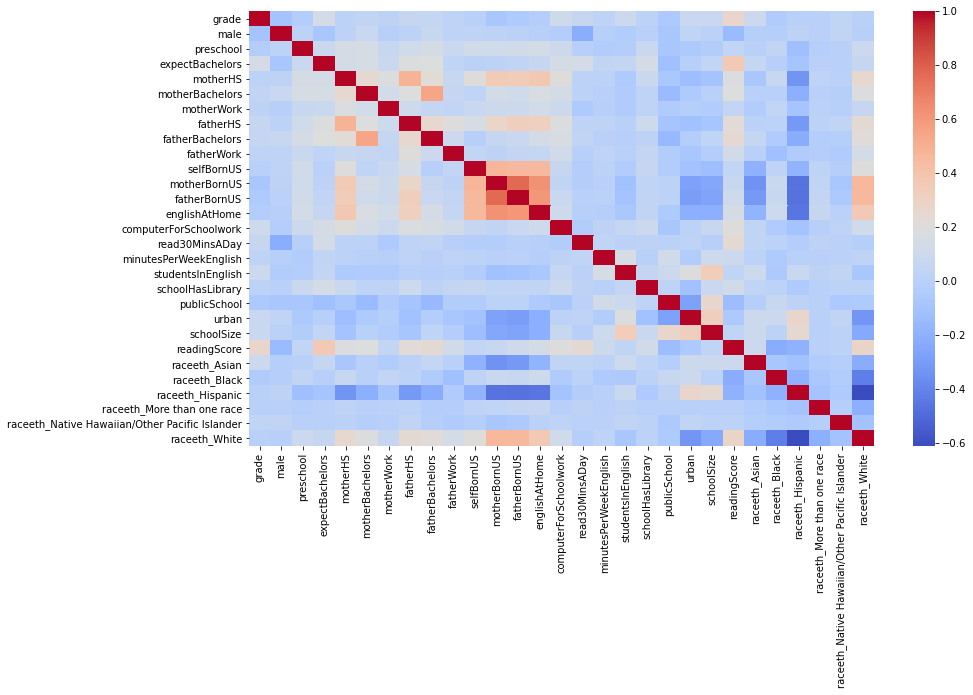

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(method='spearman'),cmap='coolwarm')

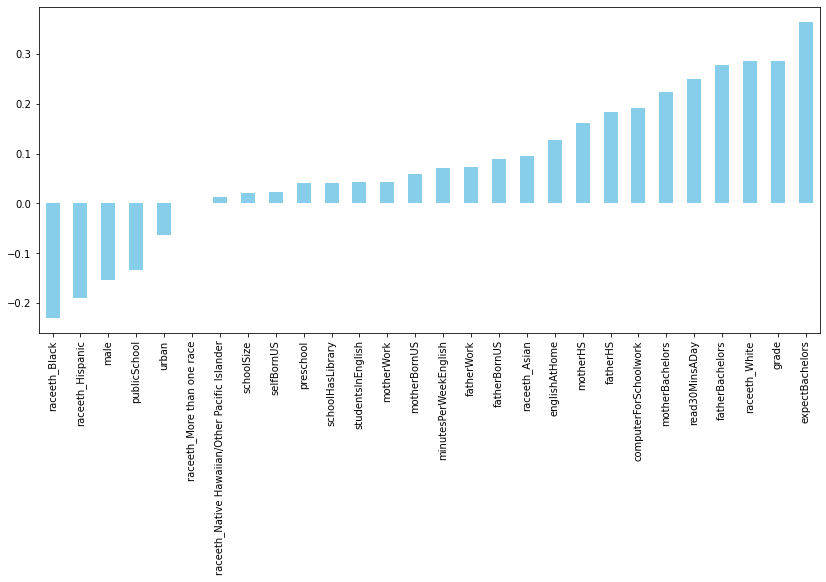

In [23]:
# Bar plot clearly shows the correlations with the reading Score inorder 
# 

plt.figure(figsize=(14,6))
train.corr()['readingScore'].sort_values().drop('readingScore').plot(kind='bar',color='skyblue')

In [24]:
X_train= train.drop('readingScore',axis=1)   # Feature data, predictors
y_train= train['readingScore']                # Target variable

In [25]:
X_train

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,schoolHasLibrary,publicSchool,urban,schoolSize,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,11.0,1.0,0.606351,0.0,0.640926,0.194171,1.000000,0.587983,0.206750,1.0,...,1.0,1.0,1.0,673.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,11.0,1.0,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,...,1.0,1.0,0.0,1173.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,9.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.734567,1.0,...,1.0,1.0,0.0,1233.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,10.0,0.0,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,...,1.0,1.0,1.0,2640.000000,0.0,1.0,0.0,0.0,0.0,0.0
4,10.0,1.0,1.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,1.0,1.0,1.0,1095.000000,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9.0,1.0,0.000000,1.0,1.000000,0.630779,0.000000,1.000000,1.000000,1.0,...,1.0,1.0,0.0,421.000000,0.0,0.0,0.0,0.0,0.0,1.0
3659,9.0,1.0,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,...,1.0,1.0,0.0,1317.000000,0.0,0.0,0.0,0.0,0.0,1.0
3660,10.0,1.0,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,...,1.0,1.0,1.0,539.000000,0.0,0.0,1.0,0.0,0.0,0.0
3661,11.0,1.0,0.000000,0.0,1.000000,0.000000,0.736552,0.906307,0.000000,1.0,...,1.0,1.0,1.0,1853.498245,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
X_train.shape

(3663, 28)

In [27]:
y_train.shape

(3663,)

In [28]:
# Scaling the Data as the units are differed from each other for example schools size unit is difference than the grade

#Normalizing the data because I will use a Deep Learing with Tensorflow model as well that needs to be normalizing the data


scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)

In [29]:
X_train_scaled.shape


(3663, 28)

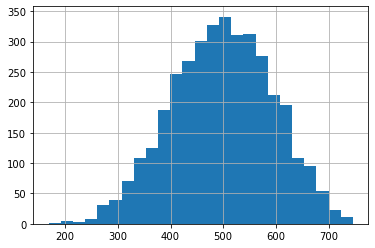

In [30]:
# The target variable has a normal distribution which does not a transformation and it applies to our linear model perfectly


y_train.hist(bins=25)

In [31]:
# Linear Regression Model 

lrModel=LinearRegression()

In [32]:
lrModel.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# R^2 score on the training set based on all the variables

lrModel.score(X_train_scaled,y_train)

0.369758085172729

In [34]:
# Coefficients of the model
lrModel.coef_

array([133.27938451, -17.32897015,  -4.99360021,  57.93784502,
        10.59657234,  13.59647833,  -0.33598998,   2.142568  ,
        24.27059553,   5.65105406,  -3.60011918, -14.72205109,
         9.22609181,  17.02744453,  20.91853256,  41.21721722,
        69.59438076,  -7.11409006,  10.89064404, -32.91110864,
        -9.18679111,  60.15472936,  65.38311606, -10.40238155,
        23.93174951,  40.20388872,  45.06914585,  60.03879981])

In [35]:
coefficients= pd.DataFrame(lrModel.coef_,index=X_train.columns,columns=['Coefficients'])

In [36]:
coefficients

,Coefficients
grade,133.279385
male,-17.328970
preschool,-4.993600
expectBachelors,57.937845
motherHS,10.596572
motherBachelors,13.596478
motherWork,-0.335990
fatherHS,2.142568
fatherBachelors,24.270596
fatherWork,5.651054


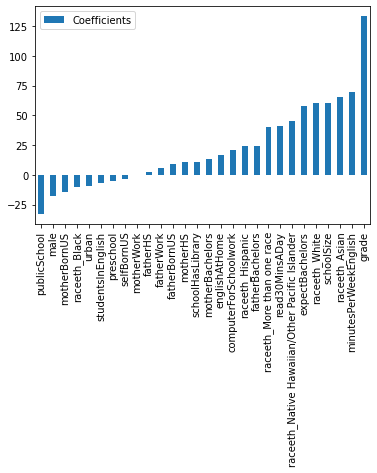

In [37]:
# Coefficients in order 
# In order the top most important features as the first model suggest 
# Positive 1. grade 2. Minute pre week English 3. raceeth asian 4. scool size 5. raceeth white 6. expect bachelors etc 

coefficients.sort_values(by='Coefficients').plot(kind='bar')

In [38]:
test= pd.read_csv('pisa2009test.csv')

In [39]:
test.shape

(1570, 24)

In [40]:
test.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [41]:
test.isnull().sum()

grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1557 non-null   object 
 3   preschool              1549 non-null   float64
 4   expectBachelors        1547 non-null   float64
 5   motherHS               1525 non-null   float64
 6   motherBachelors        1382 non-null   float64
 7   motherWork             1534 non-null   float64
 8   fatherHS               1445 non-null   float64
 9   fatherBachelors        1282 non-null   float64
 10  fatherWork             1457 non-null   float64
 11  selfBornUS             1546 non-null   float64
 12  motherBornUS           1547 non-null   float64
 13  fatherBornUS           1512 non-null   float64
 14  englishAtHome          1543 non-null   float64
 15  comp

In [43]:

# Imputting the raceeth vals with the most frequent kind as it it is a object type
test['raceeth']=imp_obj.fit_transform(test['raceeth'].values.reshape(-1,1))

In [44]:
# Get the dummies on the test set

test =pd.get_dummies(test,drop_first=True)

In [45]:
test.shape

(1570, 29)

In [46]:
test.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,0,808.0,355.24,0,0,0,0,0,1
1,10,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,808.0,385.57,0,0,0,0,0,1
2,10,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,808.0,522.62,0,0,0,0,0,1
3,10,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,0,808.0,406.24,0,0,0,0,0,1
4,10,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,808.0,453.50,0,0,0,0,0,1


In [47]:

# Imputting the all Null values 
test= pd.DataFrame(imp_all_null.fit_transform(test),columns=test.columns)

In [48]:
test

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,readingScore,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10.0,0.0,1.0,0.0,1.0,1.000000,1.0000,1.000000,0.000000,0.0,...,1.0,0.0,808.0,355.24,0.0,0.0,0.0,0.0,0.0,1.0
1,10.0,1.0,0.0,0.0,1.0,0.000000,1.0000,1.000000,0.000000,1.0,...,1.0,0.0,808.0,385.57,0.0,0.0,0.0,0.0,0.0,1.0
2,10.0,0.0,1.0,0.0,1.0,0.000000,1.0000,1.000000,0.000000,1.0,...,1.0,0.0,808.0,522.62,0.0,0.0,0.0,0.0,0.0,1.0
3,10.0,0.0,1.0,0.0,1.0,1.000000,1.0000,1.000000,0.000000,0.0,...,1.0,0.0,808.0,406.24,0.0,0.0,0.0,0.0,0.0,1.0
4,10.0,0.0,1.0,1.0,1.0,0.000000,0.0000,1.000000,1.000000,1.0,...,1.0,0.0,808.0,453.50,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,9.0,1.0,1.0,1.0,1.0,0.000000,1.0000,0.000000,0.000000,1.0,...,1.0,0.0,987.0,465.58,0.0,0.0,0.0,0.0,0.0,1.0
1566,11.0,0.0,1.0,0.0,1.0,0.000000,0.8498,1.000000,0.000000,1.0,...,1.0,0.0,987.0,380.18,0.0,0.0,0.0,0.0,0.0,1.0
1567,10.0,0.0,1.0,1.0,1.0,0.232647,1.0000,0.852066,0.147326,1.0,...,1.0,0.0,987.0,324.10,0.0,0.0,1.0,0.0,0.0,0.0
1568,10.0,0.0,1.0,1.0,1.0,1.000000,1.0000,1.000000,1.000000,1.0,...,1.0,0.0,987.0,596.34,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
test.isnull().sum()

grade                                             0
male                                              0
preschool                                         0
expectBachelors                                   0
motherHS                                          0
motherBachelors                                   0
motherWork                                        0
fatherHS                                          0
fatherBachelors                                   0
fatherWork                                        0
selfBornUS                                        0
motherBornUS                                      0
fatherBornUS                                      0
englishAtHome                                     0
computerForSchoolwork                             0
read30MinsADay                                    0
minutesPerWeekEnglish                             0
studentsInEnglish                                 0
schoolHasLibrary                                  0
publicSchool

In [50]:
X_test= test.drop('readingScore',axis=1)   # Feature data test, predictors
y_test= test['readingScore']                # Target test variable

In [51]:
y_test

0       355.24
1       385.57
2       522.62
3       406.24
4       453.50
         ...  
1565    465.58
1566    380.18
1567    324.10
1568    596.34
1569    577.43
Name: readingScore, Length: 1570, dtype: float64

In [52]:
X_test_scaled= scaler.transform(X_test)  

In [53]:
# PREDICTIONS ON TEST SET
predictions= lrModel.predict(X_test_scaled)

In [54]:
predictions


array([462.41689409, 446.58467392, 458.60116102, ..., 483.2670152 ,
       587.38139956, 538.28791801])

In [55]:
# R ^ 2 test on the test data set with the all variables

lrModel.score(X_test_scaled,y_test)

0.3152140459422268

Text(0.5, 1.0, 'RESIDUAL PLOT Distribution')

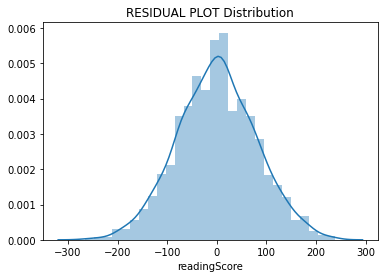

In [56]:
# Residuals Plot
# It is clearly shows that the residual plot on all the predictors is normaly distributed 

sns.distplot(predictions- y_test)
plt.title('RESIDUAL PLOT Distribution')



Text(0.5, 1.0, 'Scatter Plot Y True Vs Predictions ')

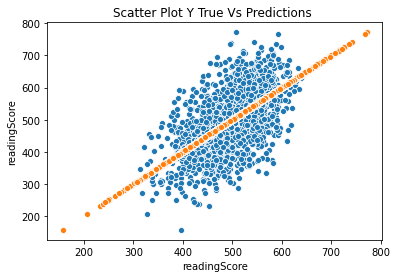

In [57]:
sns.scatterplot(predictions,y_test)
sns.scatterplot(y_test,y_test)
plt.title("Scatter Plot Y True Vs Predictions ")

In [58]:
# Explained score of 30 % shows that the factor analysis is associated with the model and factor analysis

explained_variance_score(y_test,predictions)

0.31521830489667824

In [59]:
# ROOT MEAN SQUARE ERROR of 82 on test set with the all variables

np.sqrt(mean_squared_error(y_test,predictions))

79.26783418060452

In [60]:
# Cross Val Scores based on the test set
cross_val_score(lrModel,X_test,y_test)

array([0.29992933, 0.19970677, 0.20915095, 0.36079812, 0.32814148])

In [61]:
# ROOT MEAN SQUARE ERROR of 79 on test set with the all variables 79
# Explained score of 30 % 


# RANDOM FOREST



In [62]:
# X_test_scaled
# X_train_scaled
# y_test
# y_train

In [63]:
randForest= RandomForestRegressor(n_estimators=100)

In [64]:
randForest.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
# R^2 based on the all predictors 91 % on train set
randForest.score(X_train_scaled,y_train)

0.9083212522800861

In [66]:
forest_predictions= randForest.predict(X_test_scaled)

In [67]:
forest_predictions

array([422.7945, 419.2917, 446.8242, ..., 507.2803, 590.0924, 553.8233])

In [68]:
r2_score(y_test,forest_predictions)

0.3311138843367083

Text(0.5, 1.0, 'RESIDUAL PLOT Distribution Random Forest')

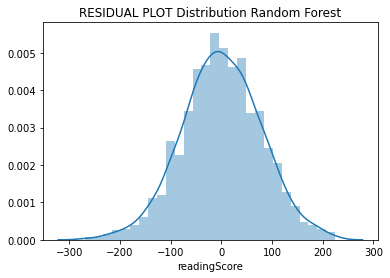

In [69]:
# Residuals Plot
# It is clearly shows that the residual plot on all the predictors is normaly distributed 

sns.distplot(forest_predictions- y_test)
plt.title('RESIDUAL PLOT Distribution Random Forest')


Text(0.5, 1.0, 'Scatter Plot Y True Vs Predictions Random Forest ')

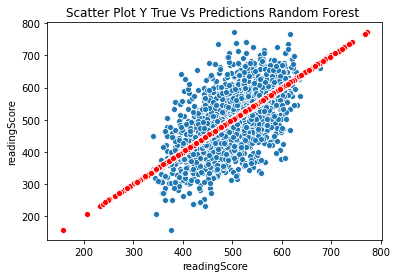

In [70]:
sns.scatterplot(forest_predictions,y_test)
sns.scatterplot(y_test,y_test, color='r')
plt.title("Scatter Plot Y True Vs Predictions Random Forest ")

In [71]:
np.sqrt(mean_squared_error(y_test,forest_predictions))

78.34218155260913

In [72]:
importance_features=pd.DataFrame(randForest.feature_importances_,index=X_test.columns,
                                 columns=['importance']).sort_values(by='importance',ascending=False)

In [73]:
importance_features

,importance
expectBachelors,0.143944
schoolSize,0.139488
minutesPerWeekEnglish,0.111032
studentsInEnglish,0.097156
grade,0.078822
fatherBachelors,0.074238
raceeth_White,0.045015
read30MinsADay,0.039358
motherBachelors,0.033503
male,0.021797


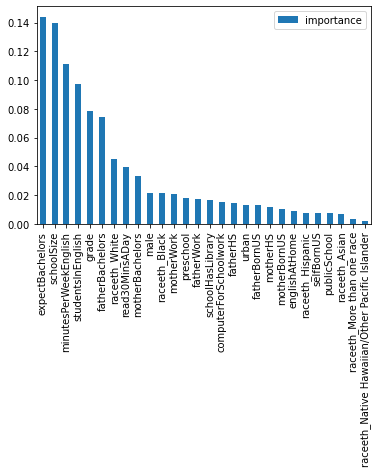

In [74]:
# Importance features based on Random Forest Estimator

importance_features.plot(kind='bar')

In [129]:
r2_score(y_test,forest_predictions)

0.3311138843367083

In [75]:
# Cross val score on the test data
cross_val_score(randForest,X_test,y_test)

array([0.33578434, 0.22657283, 0.28154744, 0.32578176, 0.28824247])

In [76]:
# ROOT MEAN SQUARE ERROR of 78 on test set with the all variables 
# Explained score of 33 % 


# DecisionTreeRegressor

In [77]:
tree= DecisionTreeRegressor()


In [78]:
tree.fit(X_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
# R^ 2 score on the traning tree
tree.score(X_train_scaled,y_train)

0.9984088797711335

In [80]:
tree_predictions= tree.predict(X_test_scaled)

In [81]:
tree_predictions

array([412.04, 292.26, 479.8 , ..., 511.1 , 581.32, 537.87])

In [82]:
r2_score(y_test,tree_predictions)

-0.2653743739062213

Text(0.5, 1.0, 'RESIDUAL PLOT Distribution Tree')

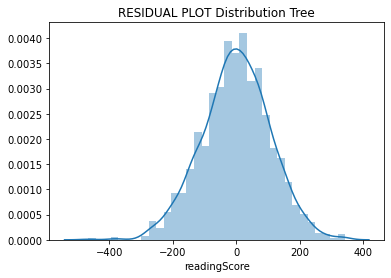

In [83]:
# Residuals Plot
# It is clearly shows that the residual plot on all the predictors is normaly distributed 

sns.distplot(tree_predictions- y_test)
plt.title('RESIDUAL PLOT Distribution Tree')

Text(0.5, 1.0, 'Scatter Plot Y True Vs Predictions Tree ')

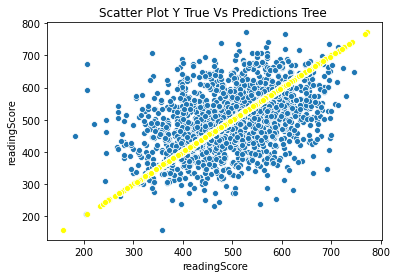

In [84]:
sns.scatterplot(tree_predictions,y_test)
sns.scatterplot(y_test,y_test, color='yellow')
plt.title("Scatter Plot Y True Vs Predictions Tree ")

In [85]:
np.sqrt(mean_squared_error(y_test,tree_predictions))

107.75292989151264

In [86]:
cross_val_score(tree,X_test_scaled,y_test)

array([-0.31940013, -0.46327876, -0.45351955, -0.5872706 , -0.40067615])

# Artifitial Neural Net Works with Twnsorflow

In [87]:
len(X_train.columns)

28

In [88]:
ANN = tf.keras.Sequential()
ANN.add(tf.keras.layers.Dense(28,activation='relu'))
ANN.add(tf.keras.layers.Dense(28,activation='relu'))
ANN.add(tf.keras.layers.Dense(28,activation='relu'))
ANN.add(tf.keras.layers.Dense(1))

ANN.compile(optimizer='adam',loss='mse')





In [89]:
ANN.fit(x=X_train_scaled,y=y_train.values,
          validation_data=(X_test_scaled,y_test.values),
          batch_size=128,epochs=400)

Train on 3663 samples, validate on 1570 samples
Epoch 1/400
3663/3663 [==============================] - 2s 463us/sample - loss: 255549.6678 - val_loss: 252581.5672
Epoch 2/400
3663/3663 [==============================] - 0s 24us/sample - loss: 248215.2126 - val_loss: 237235.8937
Epoch 3/400
3663/3663 [==============================] - 0s 25us/sample - loss: 215125.9090 - val_loss: 177203.6671
Epoch 4/400
3663/3663 [==============================] - 0s 27us/sample - loss: 120820.6167 - val_loss: 53582.4296
Epoch 5/400
3663/3663 [==============================] - 0s 22us/sample - loss: 20683.6957 - val_loss: 10074.4791
Epoch 6/400
3663/3663 [==============================] - 0s 23us/sample - loss: 9727.0766 - val_loss: 9219.5099
Epoch 7/400
3663/3663 [==============================] - 0s 23us/sample - loss: 9081.3516 - val_loss: 9012.7897
Epoch 8/400
3663/3663 [==============================] - 0s 24us/sample - loss: 8871.5373 - val_loss: 8848.5278
Epoch 9/400
3663/3663 [===============

Epoch 73/400
3663/3663 [==============================] - 0s 24us/sample - loss: 5732.9765 - val_loss: 6432.0069
Epoch 74/400
3663/3663 [==============================] - 0s 26us/sample - loss: 5738.8340 - val_loss: 6374.7249
Epoch 75/400
3663/3663 [==============================] - 0s 22us/sample - loss: 5717.0906 - val_loss: 6466.8983
Epoch 76/400
3663/3663 [==============================] - 0s 22us/sample - loss: 5728.7540 - val_loss: 6379.1313
Epoch 77/400
3663/3663 [==============================] - 0s 21us/sample - loss: 5741.0997 - val_loss: 6367.1407
Epoch 78/400
3663/3663 [==============================] - 0s 25us/sample - loss: 5705.4976 - val_loss: 6365.0271
Epoch 79/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5695.5439 - val_loss: 6358.3027
Epoch 80/400
3663/3663 [==============================] - 0s 22us/sample - loss: 5716.9396 - val_loss: 6417.9799
Epoch 81/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5696.7424 - val

3663/3663 [==============================] - 0s 25us/sample - loss: 5569.1607 - val_loss: 6263.3030
Epoch 146/400
3663/3663 [==============================] - 0s 21us/sample - loss: 5575.2260 - val_loss: 6276.3757
Epoch 147/400
3663/3663 [==============================] - 0s 25us/sample - loss: 5572.2244 - val_loss: 6284.9584
Epoch 148/400
3663/3663 [==============================] - 0s 18us/sample - loss: 5572.0169 - val_loss: 6260.8213
Epoch 149/400
3663/3663 [==============================] - 0s 19us/sample - loss: 5569.6371 - val_loss: 6272.5634
Epoch 150/400
3663/3663 [==============================] - 0s 25us/sample - loss: 5565.6124 - val_loss: 6270.3441
Epoch 151/400
3663/3663 [==============================] - 0s 22us/sample - loss: 5552.5941 - val_loss: 6267.3243
Epoch 152/400
3663/3663 [==============================] - 0s 21us/sample - loss: 5568.0748 - val_loss: 6261.2212
Epoch 153/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5617.0778 - val_loss

3663/3663 [==============================] - 0s 22us/sample - loss: 5545.0641 - val_loss: 6251.4308
Epoch 217/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5521.8202 - val_loss: 6246.1955
Epoch 218/400
3663/3663 [==============================] - 0s 21us/sample - loss: 5518.5078 - val_loss: 6258.2453
Epoch 219/400
3663/3663 [==============================] - 0s 20us/sample - loss: 5567.1001 - val_loss: 6291.8600
Epoch 220/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5525.6515 - val_loss: 6244.8304
Epoch 221/400
3663/3663 [==============================] - 0s 26us/sample - loss: 5541.8332 - val_loss: 6285.7684
Epoch 222/400
3663/3663 [==============================] - 0s 24us/sample - loss: 5539.8771 - val_loss: 6249.2679
Epoch 223/400
3663/3663 [==============================] - 0s 25us/sample - loss: 5534.9358 - val_loss: 6261.4477
Epoch 224/400
3663/3663 [==============================] - 0s 21us/sample - loss: 5581.6500 - val_loss

Epoch 288/400
3663/3663 [==============================] - 0s 22us/sample - loss: 5525.0799 - val_loss: 6226.2222
Epoch 289/400
3663/3663 [==============================] - 0s 21us/sample - loss: 5504.1172 - val_loss: 6238.0649
Epoch 290/400
3663/3663 [==============================] - 0s 24us/sample - loss: 5501.3208 - val_loss: 6261.7171
Epoch 291/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5506.6269 - val_loss: 6226.0665
Epoch 292/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5522.9257 - val_loss: 6241.3356
Epoch 293/400
3663/3663 [==============================] - 0s 22us/sample - loss: 5497.5260 - val_loss: 6224.6650
Epoch 294/400
3663/3663 [==============================] - 0s 22us/sample - loss: 5489.1622 - val_loss: 6226.6751
Epoch 295/400
3663/3663 [==============================] - 0s 20us/sample - loss: 5491.4196 - val_loss: 6238.1657
Epoch 296/400
3663/3663 [==============================] - 0s 24us/sample - loss: 5496.0

Epoch 360/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5516.5675 - val_loss: 6235.7953
Epoch 361/400
3663/3663 [==============================] - 0s 25us/sample - loss: 5488.3449 - val_loss: 6224.1078
Epoch 362/400
3663/3663 [==============================] - 0s 21us/sample - loss: 5507.7311 - val_loss: 6238.6227
Epoch 363/400
3663/3663 [==============================] - 0s 29us/sample - loss: 5484.5694 - val_loss: 6246.3245
Epoch 364/400
3663/3663 [==============================] - 0s 26us/sample - loss: 5491.5798 - val_loss: 6230.7523
Epoch 365/400
3663/3663 [==============================] - 0s 24us/sample - loss: 5477.1564 - val_loss: 6224.8516
Epoch 366/400
3663/3663 [==============================] - 0s 19us/sample - loss: 5491.4436 - val_loss: 6234.7026
Epoch 367/400
3663/3663 [==============================] - 0s 27us/sample - loss: 5495.6793 - val_loss: 6236.9476
Epoch 368/400
3663/3663 [==============================] - 0s 23us/sample - loss: 5497.0

In [90]:
losses = pd.DataFrame(ANN.history.history)

In [91]:
losses

,loss,val_loss
0,255549.667776,252581.567197
1,248215.212569,237235.893650
2,215125.908967,177203.667058
3,120820.616712,53582.429648
4,20683.695749,10074.479113
...,...,...
395,5497.200776,6246.666979
396,5476.580535,6243.719613
397,5473.243428,6278.301717
398,5478.064645,6224.878089


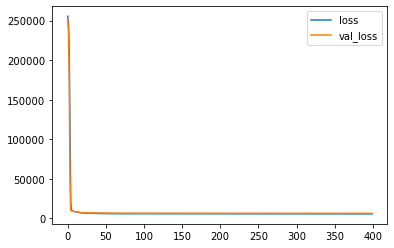

In [92]:
# Perfect  model on val_score and loss

losses.plot()

In [93]:
ANN_predictions = ANN.predict(X_test_scaled)

In [94]:
ANN_predictions

array([[436.89725],
       [442.99704],
       [454.91672],
       ...,
       [478.88757],
       [595.3041 ],
       [538.9592 ]], dtype=float32)

In [95]:
np.sqrt(mean_squared_error(y_test,ANN_predictions))

78.8781511407843

In [96]:
explained_variance_score(y_test,ANN_predictions)

0.32220126869871024

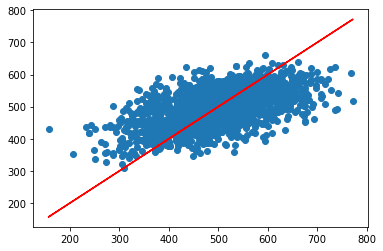

In [97]:
# Our predictions
plt.scatter(y_test,ANN_predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [98]:
errors = y_test.values - ANN_predictions

In [99]:
errors

array([[ -81.65724731,  -51.32724731,   85.72275269, ..., -112.79724731,
         159.44275269,  140.53275269],
       [ -87.75703979,  -57.42703979,   79.62296021, ..., -118.89703979,
         153.34296021,  134.43296021],
       [ -99.67671753,  -69.34671753,   67.70328247, ..., -130.81671753,
         141.42328247,  122.51328247],
       ...,
       [-123.64757324,  -93.31757324,   43.73242676, ..., -154.78757324,
         117.45242676,   98.54242676],
       [-240.06407715, -209.73407715,  -72.68407715, ..., -271.20407715,
           1.03592285,  -17.87407715],
       [-183.71922852, -153.38922852,  -16.33922852, ..., -214.85922852,
          57.38077148,   38.47077148]])

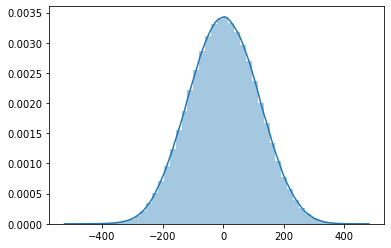

In [100]:
sns.distplot(errors)

## Training the estimators and ANN Based on Importance Features Extracted from Random Forest Model's Important Features

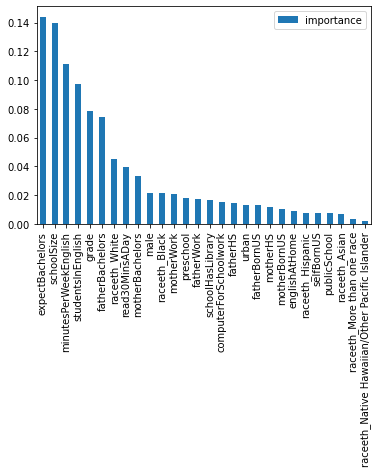

In [101]:
importance_features.plot(kind='bar')


In [102]:
# The Importance features based on Random Forest selections are : THE TOP 9 features above of 0.04 

# 'expectBachelors', 'schoolSize', 'minutesPerWeekEnglish', 'studentsInEnglish', 'grade', 'fatherBachelors', 
# 'raceeth_White', 'read30MinsADay', 'motherBachelors'

In [103]:
X_train.columns

Index(['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'raceeth_Asian', 'raceeth_Black',
       'raceeth_Hispanic', 'raceeth_More than one race',
       'raceeth_Native Hawaiian/Other Pacific Islander', 'raceeth_White'],
      dtype='object')

In [104]:
# Choosing the importance features on the X_train Set
X_train_selected_features=X_train[['expectBachelors', 'schoolSize', 'minutesPerWeekEnglish', 
                                   'studentsInEnglish', 'grade', 'fatherBachelors', 
                                    'raceeth_White', 'read30MinsADay', 'motherBachelors']]

In [105]:
X_train_selected_features

,expectBachelors,schoolSize,minutesPerWeekEnglish,studentsInEnglish,grade,fatherBachelors,raceeth_White,read30MinsADay,motherBachelors
0,0.0,673.000000,225.0,23.969055,11.0,0.206750,1.0,0.0,0.194171
1,0.0,1173.000000,450.0,25.000000,11.0,0.000000,1.0,1.0,1.000000
2,1.0,1233.000000,250.0,28.000000,9.0,0.734567,1.0,0.0,1.000000
3,1.0,2640.000000,200.0,23.000000,10.0,0.000000,0.0,1.0,0.000000
4,0.0,1095.000000,250.0,35.000000,10.0,0.000000,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...
3658,1.0,421.000000,250.0,20.000000,9.0,1.000000,1.0,0.0,0.630779
3659,0.0,1317.000000,450.0,16.000000,9.0,0.000000,1.0,1.0,0.000000
3660,1.0,539.000000,225.0,16.000000,10.0,0.000000,0.0,0.0,0.000000
3661,0.0,1853.498245,54.0,36.000000,11.0,0.000000,0.0,0.0,0.000000


In [106]:
X_train_selected_features.shape

(3663, 9)

In [107]:
X_test_selected_features=X_test[['expectBachelors', 'schoolSize', 'minutesPerWeekEnglish', 
                                   'studentsInEnglish', 'grade', 'fatherBachelors', 
                                    'raceeth_White', 'read30MinsADay', 'motherBachelors']]

In [108]:
X_test_selected_features

,expectBachelors,schoolSize,minutesPerWeekEnglish,studentsInEnglish,grade,fatherBachelors,raceeth_White,read30MinsADay,motherBachelors
0,0.0,808.0,240.000000,30.000000,10.0,0.000000,1.0,0.0,1.000000
1,0.0,808.0,255.000000,23.392971,10.0,0.000000,1.0,0.0,0.000000
2,0.0,808.0,265.907530,30.000000,10.0,0.000000,1.0,0.0,0.000000
3,0.0,808.0,160.000000,30.000000,10.0,0.000000,1.0,0.0,1.000000
4,1.0,808.0,240.000000,30.000000,10.0,1.000000,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1565,1.0,987.0,300.000000,20.000000,9.0,0.000000,1.0,0.0,0.000000
1566,0.0,987.0,450.000000,25.000000,11.0,0.000000,1.0,0.0,0.000000
1567,1.0,987.0,251.417187,23.942401,10.0,0.147326,0.0,0.0,0.232647
1568,1.0,987.0,450.000000,20.000000,10.0,1.000000,1.0,1.0,1.000000


In [109]:
X_test_selected_features.shape

(1570, 9)

In [110]:
# Scaling the train set and test set
X_train_selected_features_scaled= scaler.fit_transform(X_train_selected_features)

In [111]:
X_train_selected_features_scaled

array([[0.        , 0.08689718, 0.09375   , ..., 1.        , 0.05681559,
        0.3944024 ],
       [0.        , 0.16272369, 0.1875    , ..., 1.        , 1.        ,
        1.        ],
       [0.93781934, 0.17182287, 0.10416667, ..., 1.        , 0.05681559,
        1.        ],
       ...,
       [0.93781934, 0.06657567, 0.09375   , ..., 0.        , 0.05681559,
        0.24847857],
       [0.        , 0.2659233 , 0.0225    , ..., 0.        , 0.05681559,
        0.24847857],
       [0.93781934, 0.01925993, 0.09791667, ..., 1.        , 1.        ,
        0.24847857]])

In [112]:
X_test_selected_features_scaled= scaler.transform(X_test_selected_features)

In [113]:
X_test_selected_features_scaled

array([[0.        , 0.10737034, 0.1       , ..., 1.        , 0.05681559,
        1.        ],
       [0.        , 0.10737034, 0.10625   , ..., 1.        , 0.05681559,
        0.24847857],
       [0.        , 0.10737034, 0.1107948 , ..., 1.        , 0.05681559,
        0.24847857],
       ...,
       [0.93781934, 0.13451623, 0.10475716, ..., 0.        , 0.05681559,
        0.42331787],
       [0.93781934, 0.13451623, 0.1875    , ..., 1.        , 1.        ,
        1.        ],
       [0.93781934, 0.13451623, 0.1875    , ..., 1.        , 0.05681559,
        0.24847857]])

In [114]:
# Loop throuh all the estimators

model_list=[]
model_list.append(('LinearRegression', LinearRegression()))
model_list.append(('RandomForest',RandomForestRegressor(n_estimators=200)))
model_list.append(('DecisionTreeRegressor',DecisionTreeRegressor()))

def train_predict(X_train_selected_features_scaled,X_test_selected_features_scaled,y_train,y_test):
    
    """ Function to train and predict the """
    
    for name, estimator in model_list:
        
        
        print(f'Model Name:  {name} ')
        print('**' * 50)
        
        estimator.fit(X_train_selected_features_scaled,y_train)
        
        y_pred= estimator.predict(X_test_selected_features_scaled)
        
        print('\n')
        print(f'RMSE  ===========>  {np.sqrt(mean_squared_error(y_test,y_pred))}')
        print(f'Explained Variance Score Moel {name} ==========> {explained_variance_score(y_test,y_pred)}')
        print(f'Cross Validation Scores ==================> {cross_val_score(estimator,X_test_selected_features_scaled,y_test)}')
        print('\n')
        print('\n')
        

In [115]:
train_predict(X_train_selected_features_scaled,X_test_selected_features_scaled,y_train,y_test)

Model Name:  LinearRegression 
****************************************************************************************************


RMSE  ===========>  81.37835398394162
Explained Variance Score Moel LinearRegression ==========> 0.2782646516493822
Cross Validation Scores ==================> [0.27297476 0.21191104 0.23826393 0.32088557 0.27553214]




Model Name:  RandomForest 
****************************************************************************************************


RMSE  ===========>  81.79581382413775
Explained Variance Score Moel RandomForest ==========> 0.2708506635917248
Cross Validation Scores ==================> [0.2826694  0.20236685 0.29205035 0.25213934 0.21878589]




Model Name:  DecisionTreeRegressor 
****************************************************************************************************


RMSE  ===========>  107.23085668209991
Explained Variance Score Moel DecisionTreeRegressor ==========> -0.2531330711438631
Cross Validation Scores ============

# ANN Based on the Importance Feaures

In [116]:
len(X_train_selected_features.columns)

9

In [117]:
ANN_selected = tf.keras.Sequential()
ANN_selected.add(tf.keras.layers.Dense(9,activation='relu'))
ANN_selected.add(tf.keras.layers.Dense(9,activation='relu'))
ANN_selected.add(tf.keras.layers.Dense(9,activation='relu'))
ANN_selected.add(tf.keras.layers.Dense(1))

ANN_selected.compile(optimizer='adam',loss='mse')


In [118]:
ANN_selected.fit(x=X_train_selected_features_scaled,y=y_train.values,
          validation_data=(X_test_selected_features_scaled,y_test.values),
          batch_size=128,epochs=400)

Train on 3663 samples, validate on 1570 samples
Epoch 1/400
3663/3663 [==============================] - 1s 298us/sample - loss: 256451.5195 - val_loss: 255100.3256
Epoch 2/400
3663/3663 [==============================] - 0s 26us/sample - loss: 255645.6597 - val_loss: 254043.1603
Epoch 3/400
3663/3663 [==============================] - 0s 24us/sample - loss: 254137.6166 - val_loss: 251899.4568
Epoch 4/400
3663/3663 [==============================] - 0s 19us/sample - loss: 250951.1401 - val_loss: 247263.8975
Epoch 5/400
3663/3663 [==============================] - 0s 34us/sample - loss: 244204.4730 - val_loss: 237911.0481
Epoch 6/400
3663/3663 [==============================] - 0s 20us/sample - loss: 231342.8776 - val_loss: 221026.8357
Epoch 7/400
3663/3663 [==============================] - 0s 20us/sample - loss: 210103.7626 - val_loss: 195065.1759
Epoch 8/400
3663/3663 [==============================] - 0s 23us/sample - loss: 179391.8008 - val_loss: 159725.6380
Epoch 9/400
3663/3663 [

3663/3663 [==============================] - 0s 20us/sample - loss: 6481.9554 - val_loss: 6896.1516
Epoch 73/400
3663/3663 [==============================] - 0s 21us/sample - loss: 6476.1147 - val_loss: 6893.1798
Epoch 74/400
3663/3663 [==============================] - 0s 19us/sample - loss: 6462.8746 - val_loss: 6881.5087
Epoch 75/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6459.4245 - val_loss: 6875.8389
Epoch 76/400
3663/3663 [==============================] - 0s 27us/sample - loss: 6451.3940 - val_loss: 6873.4995
Epoch 77/400
3663/3663 [==============================] - 0s 24us/sample - loss: 6440.7125 - val_loss: 6862.2003
Epoch 78/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6440.5784 - val_loss: 6856.8461
Epoch 79/400
3663/3663 [==============================] - 0s 24us/sample - loss: 6431.6940 - val_loss: 6851.0152
Epoch 80/400
3663/3663 [==============================] - 0s 22us/sample - loss: 6424.7293 - val_loss: 6847.7

Epoch 144/400
3663/3663 [==============================] - 0s 34us/sample - loss: 6238.8132 - val_loss: 6687.8339
Epoch 145/400
3663/3663 [==============================] - 0s 34us/sample - loss: 6232.6006 - val_loss: 6680.2548
Epoch 146/400
3663/3663 [==============================] - 0s 34us/sample - loss: 6229.3697 - val_loss: 6678.3172
Epoch 147/400
3663/3663 [==============================] - 0s 24us/sample - loss: 6230.3882 - val_loss: 6695.6538
Epoch 148/400
3663/3663 [==============================] - 0s 22us/sample - loss: 6229.0859 - val_loss: 6678.2158
Epoch 149/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6228.7653 - val_loss: 6674.0827
Epoch 150/400
3663/3663 [==============================] - 0s 21us/sample - loss: 6227.8614 - val_loss: 6673.2647
Epoch 151/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6225.8711 - val_loss: 6671.6970
Epoch 152/400
3663/3663 [==============================] - 0s 26us/sample - loss: 6242.8

3663/3663 [==============================] - 0s 21us/sample - loss: 6180.4138 - val_loss: 6627.7967
Epoch 216/400
3663/3663 [==============================] - 0s 21us/sample - loss: 6188.9544 - val_loss: 6628.6669
Epoch 217/400
3663/3663 [==============================] - 0s 21us/sample - loss: 6189.5949 - val_loss: 6627.3726
Epoch 218/400
3663/3663 [==============================] - 0s 19us/sample - loss: 6178.6746 - val_loss: 6626.0090
Epoch 219/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6186.5049 - val_loss: 6634.6617
Epoch 220/400
3663/3663 [==============================] - 0s 24us/sample - loss: 6187.4426 - val_loss: 6639.4655
Epoch 221/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6194.6543 - val_loss: 6623.8922
Epoch 222/400
3663/3663 [==============================] - 0s 21us/sample - loss: 6187.9808 - val_loss: 6624.9330
Epoch 223/400
3663/3663 [==============================] - 0s 22us/sample - loss: 6185.0242 - val_loss

Epoch 287/400
3663/3663 [==============================] - 0s 18us/sample - loss: 6179.2079 - val_loss: 6613.3981
Epoch 288/400
3663/3663 [==============================] - 0s 22us/sample - loss: 6187.0043 - val_loss: 6625.9256
Epoch 289/400
3663/3663 [==============================] - 0s 22us/sample - loss: 6170.5085 - val_loss: 6623.4250
Epoch 290/400
3663/3663 [==============================] - 0s 25us/sample - loss: 6178.3241 - val_loss: 6612.8969
Epoch 291/400
3663/3663 [==============================] - 0s 23us/sample - loss: 6180.6608 - val_loss: 6612.8010
Epoch 292/400
3663/3663 [==============================] - 0s 19us/sample - loss: 6175.0052 - val_loss: 6612.6426
Epoch 293/400
3663/3663 [==============================] - 0s 25us/sample - loss: 6176.3322 - val_loss: 6614.0676
Epoch 294/400
3663/3663 [==============================] - 0s 25us/sample - loss: 6176.0596 - val_loss: 6616.5048
Epoch 295/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6186.5

Epoch 359/400
3663/3663 [==============================] - 0s 19us/sample - loss: 6173.2742 - val_loss: 6614.1701
Epoch 360/400
3663/3663 [==============================] - 0s 21us/sample - loss: 6180.7609 - val_loss: 6619.9408
Epoch 361/400
3663/3663 [==============================] - 0s 18us/sample - loss: 6204.7212 - val_loss: 6612.6371
Epoch 362/400
3663/3663 [==============================] - 0s 21us/sample - loss: 6178.2927 - val_loss: 6655.1023
Epoch 363/400
3663/3663 [==============================] - 0s 19us/sample - loss: 6172.7879 - val_loss: 6611.0428
Epoch 364/400
3663/3663 [==============================] - 0s 22us/sample - loss: 6177.0632 - val_loss: 6609.4558
Epoch 365/400
3663/3663 [==============================] - 0s 25us/sample - loss: 6173.5526 - val_loss: 6636.4968
Epoch 366/400
3663/3663 [==============================] - 0s 20us/sample - loss: 6184.4290 - val_loss: 6610.2552
Epoch 367/400
3663/3663 [==============================] - 0s 19us/sample - loss: 6180.1

In [119]:
losses = pd.DataFrame(ANN_selected.history.history)

In [120]:
losses

,loss,val_loss
0,256451.519464,255100.325577
1,255645.659731,254043.160271
2,254137.616644,251899.456827
3,250951.140113,247263.897532
4,244204.473003,237911.048149
...,...,...
395,6177.824747,6613.865365
396,6183.892738,6610.459103
397,6175.401801,6613.618224
398,6197.702310,6617.770316


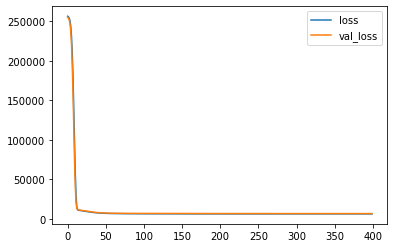

In [121]:
# Perfect  model on val_score and loss based on Feature Selected 

losses.plot()

In [122]:
predictions_ANN_selections= ANN_selected.predict(X_test_selected_features_scaled)

In [123]:
predictions_ANN_selections

array([[450.0483 ],
       [440.65726],
       [441.77353],
       ...,
       [459.89465],
       [588.47174],
       [529.9804 ]], dtype=float32)

In [124]:
# RMSE ANN Based on Feature Seletions
np.sqrt(mean_squared_error(y_test,predictions_ANN_selections))

81.30165180913822

In [125]:
# Explained variance score
explained_variance_score(y_test,predictions_ANN_selections)

0.2796855304307654

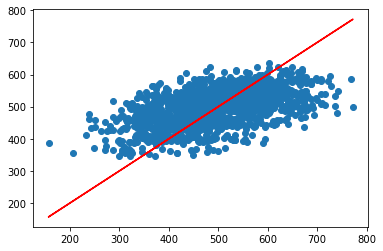

In [126]:
# Our predictions
plt.scatter(y_test,predictions_ANN_selections)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [127]:
errors = y_test.values - predictions_ANN_selections

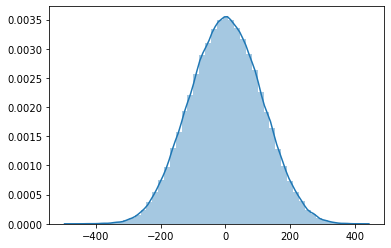

In [128]:
# The Residual plot on ANN Selected variables shows that the residual distributions is normaly distributed which shows that
# the model would be a valid model for this data due to the their normaly distributed of their variance

sns.distplot(errors)